In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
df = pd.read_csv("metrics.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])

 benchmark-results
 benchmarks
 build
 cert.pem
 check_pids.py
'client copy 2.ipynb'
'client copy.ipynb'
 client.ipynb
 client_long.ipynb
 data
 data-new
 docker-compose.yaml
 dockerfile
 file_handle_example.ipynb
 file_handles.py
 fix_notebook.py
 kernel-001c2f94-dc1b-4bda-8735-53e0aec11e3b.json
 kernel-098be492-592d-4b74-8068-9cbd85cfce79.json
 kernel-1b7f4e48-85ac-484d-a56e-26271617b62f.json
 kernel-1e63de74-e64f-4c94-a11f-62ed1f033569.json
 kernel-2aab23f0-1e12-4a7c-89bc-a6dfda2d062a.json
 kernel-3ad5e4c8-a18a-467b-8004-38db68b30302.json
 kernel-3b5ff6a2-1cdf-4d17-b55c-b1d4e35d5d54.json
 kernel-575b1b83-0030-4184-b714-4407f92015e1.json
 kernel-66a66a84-865d-4555-9008-3abbb80b122a.json
 kernel-c503c53e-0bb3-4776-91f7-aeff63dba233.json
 kernel-ec18d2e0-69ad-457b-9dbd-38c2c5aa45b2.json
 kernel_stuff.ipynb
 kernel_stuff.py
 key.pem
 LICENSE
 log.log
 logs
 megaclite
 megaclite.egg-info
 nlp_course_from_pretrained
 pids.txt
 pyproject.toml
 README.md
 requirements.txt
 result.log
 resul

In [25]:
df = df.iloc[65000:67000]

In [26]:
(df["timestamp"].iloc[1] - df["timestamp"].iloc[0]).total_seconds()

0.022312

In [27]:
df["time"] = (df["timestamp"] - df["timestamp"].iloc[0]).apply(lambda x: x.total_seconds())

In [28]:
df["time"]

65000      0.000000
65001      0.022312
65002      0.039479
65003      0.055383
65004      0.071051
            ...    
66995    249.288384
66996    249.302505
66997    249.323968
66998    249.338471
66999    249.352210
Name: time, Length: 2000, dtype: float64

Text(0, 0.5, 'GPU Util [%]')

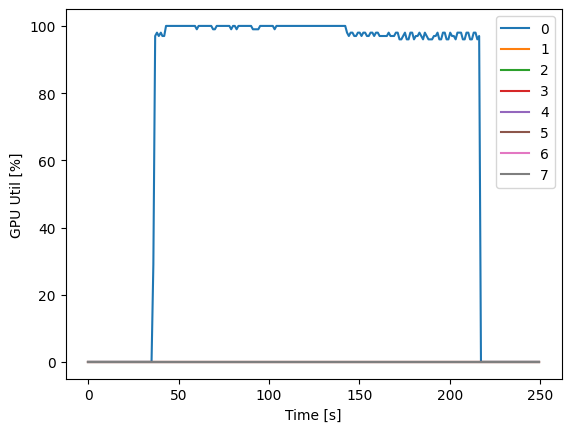

In [29]:
for name, group in df.set_index("time").groupby("index"):
    group["gpu_util"].plot(label=name)
plt.legend()
plt.xlabel("Time [s]")
plt.ylabel("GPU Util [%]")

In [30]:
df = df[df["index"] == 0]

In [31]:
df["gpu_util"].to_numpy()

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  29,  97,  98,
        97,  98,  97,  97, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100,  99, 100, 100, 100, 100,
       100, 100, 100, 100,  99,  99, 100, 100, 100, 100, 100, 100, 100,
       100,  99, 100, 100,  99, 100, 100, 100, 100, 100, 100, 100, 100,
        99,  99,  99,  99, 100, 100, 100, 100, 100, 100, 100, 100,  99,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
       100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100, 100,
        98,  97,  98,  98,  97,  97,  98,  98,  97,  98,  98,  97,  97,
        98,  98,  97,  98,  98,  97,  97,  97,  97,  97,  98,  97,  97,
        97,  98,  98,  96,  96,  97,  98,  96,  96,  98,  98,  9

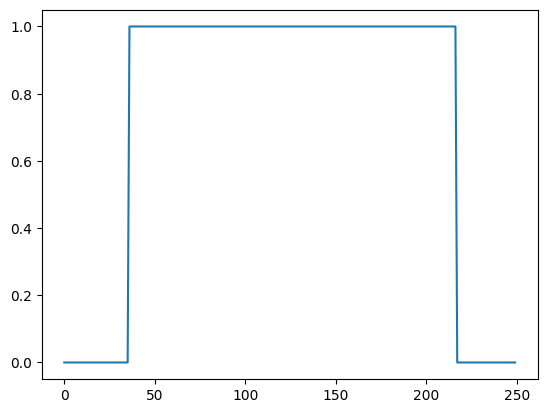

In [32]:
used = df["gpu_util"].to_numpy() > 0
plt.plot(used)

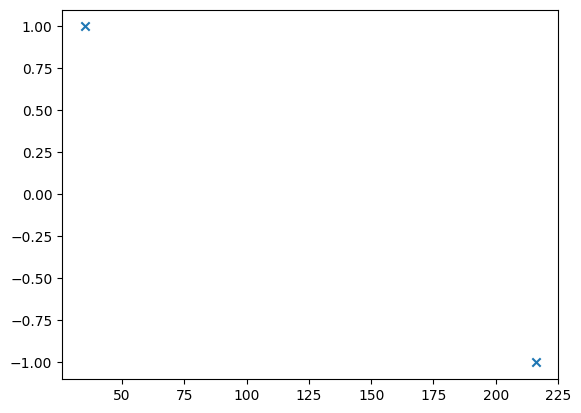

In [33]:
diffs = np.diff(used.astype(int))
plt.scatter(np.where(diffs), diffs[np.where(diffs)], marker="x")

In [34]:
start = np.where(diffs > 0)
end = np.where(diffs <0)

In [35]:
end[0] - start[0]

array([181])

<Axes: xlabel='time'>

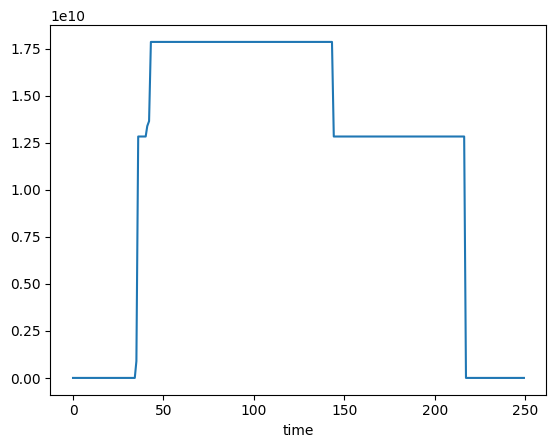

In [37]:
df.set_index("time")["gpu_memory_used"].plot()